In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()

print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: 


In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['mnt', 'var', 'dev', 'etc', 'libx32', 'sys', 'opt', 'media', 'lib64', 'sbin', 'home', 'usr', 'boot', 'lib', 'tmp', 'srv', 'lib32', 'run', 'root', 'bin', 'proc', '.dockerenv', 'tools', 'datalab', 'content', 'NGC-DL-CONTAINER-LICENSE']
/content: ['.config', 'sample_data']


In [ ]:
df=pd.read_csv('s1-s4.csv')

In [ ]:
df.tail()

,Nama Barang,Kode Barang,Waktu Discover,RSSI
326,kaos,EPC:E200 3411 B802 0110 3300 7376,Disc:2022/01/09 10:31:10,RSSI:3101.0
327,sweater,EPC:E200 3411 B802 0110 3300 7321,Disc:2022/01/09 10:31:10,RSSI:11837.2
328,boot cut,EPC:E200 3411 B802 0110 3300 7325,Disc:2022/01/09 10:31:10,RSSI:7412.0
329,gamis,EPC:E200 3411 B802 0110 3300 7267,Disc:2022/01/09 10:31:10,RSSI:7998.8
330,catsuit,EPC:E200 3411 B802 0110 3300 7331,Disc:2022/01/09 10:31:10,RSSI:6140.1


In [ ]:
df.rename(columns = {"Nama Barang": "Barang"}, inplace = True)

In [ ]:
df.RSSI.unique()

array([' RSSI:4656.0', ' RSSI:13190.5', ' RSSI:16854.9', ' RSSI:11626.5',
       ' RSSI:31474.3', ' RSSI:5076.6', ' RSSI:9068.4', ' RSSI:8648.7',
       ' RSSI:10367.6', ' RSSI:13418.9', ' RSSI:11612.5', ' RSSI:6024.6',
       ' RSSI:9247.9', ' RSSI:11032.4', ' RSSI:7888.6', ' RSSI:7295.5',
       ' RSSI:4276.2', ' RSSI:6679.2', nan, ' RSSI:6885.9',
       ' RSSI:2049.2', ' RSSI:5748.4', ' RSSI:3419.7', ' RSSI:3535.9',
       ' RSSI:2900.7', ' RSSI:5595.9', ' RSSI:3916.9', ' RSSI:3105.3',
       ' RSSI:2435.8', ' RSSI:2217.9', ' RSSI:3422.5', ' RSSI:9100.6',
       ' RSSI:10294.8', ' RSSI:10224.8', ' RSSI:9295.2', ' RSSI:10600.1',
       ' RSSI:6299.7', ' RSSI:7300.6', ' RSSI:9520.6', ' RSSI:2823.8',
       ' RSSI:7766.3', ' RSSI:4994.8', ' RSSI:8142.4', ' RSSI:2413.2',
       ' RSSI:1249.6', ' RSSI:1523.9', ' RSSI:10494.7', ' RSSI:6010.0',
       ' RSSI:9154.8', ' RSSI:9299.7', ' RSSI:8750.7', ' RSSI:8840.4',
       ' RSSI:13158.2', ' RSSI:3437.8', ' RSSI:4092.6', ' RSSI:2941.1',
    

In [ ]:
df.RSSI.nunique()

292

In [ ]:
df

,Barang,Kode Barang,Waktu Discover,RSSI
0,palazzo,EPC:E200 3411 B802 0110 3300 7337,Disc:2022/12/22 11:40:10,RSSI:4656.0
1,hot pants,EPC:E200 3411 B802 0110 3300 7322,Disc:2022/12/22 11:40:10,RSSI:13190.5
2,overalls,EPC:E200 3411 B802 0110 3300 7318,Disc:2022/12/22 11:40:10,RSSI:16854.9
3,boot cut,EPC:E200 3411 B802 0110 3300 7325,Disc:2022/12/22 11:40:10,RSSI:11626.5
4,kemeja,EPC:E200 3411 B802 0110 3300 7344,Disc:2022/12/22 11:40:10,RSSI:31474.3
...,...,...,...,...
326,kaos,EPC:E200 3411 B802 0110 3300 7376,Disc:2022/01/09 10:31:10,RSSI:3101.0
327,sweater,EPC:E200 3411 B802 0110 3300 7321,Disc:2022/01/09 10:31:10,RSSI:11837.2
328,boot cut,EPC:E200 3411 B802 0110 3300 7325,Disc:2022/01/09 10:31:10,RSSI:7412.0
329,gamis,EPC:E200 3411 B802 0110 3300 7267,Disc:2022/01/09 10:31:10,RSSI:7998.8


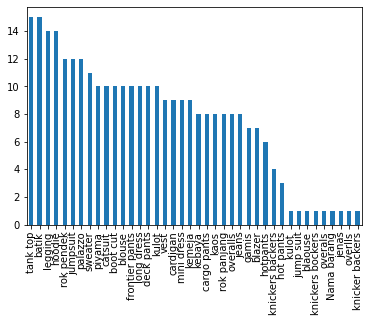

In [ ]:
df['Barang'].value_counts().plot.bar()

In [ ]:
df.head()

,Barang,Kode Barang,Waktu Discover,RSSI
0,palazzo,EPC:E200 3411 B802 0110 3300 7337,Disc:2022/12/22 11:40:10,RSSI:4656.0
1,hot pants,EPC:E200 3411 B802 0110 3300 7322,Disc:2022/12/22 11:40:10,RSSI:13190.5
2,overalls,EPC:E200 3411 B802 0110 3300 7318,Disc:2022/12/22 11:40:10,RSSI:16854.9
3,boot cut,EPC:E200 3411 B802 0110 3300 7325,Disc:2022/12/22 11:40:10,RSSI:11626.5
4,kemeja,EPC:E200 3411 B802 0110 3300 7344,Disc:2022/12/22 11:40:10,RSSI:31474.3


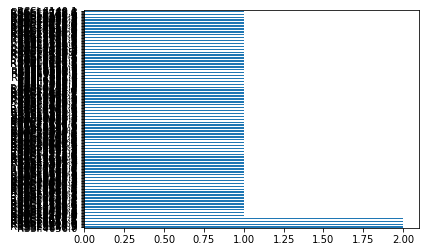

In [ ]:
df['RSSI'].value_counts().plot.barh() 

In [ ]:
df = pd.get_dummies(df)
df

,Barang_Nama barang,Barang_batik,Barang_blaouse,Barang_blazer,Barang_blouse,Barang_boot cut,Barang_cardigan,Barang_cargo pants,Barang_catsuit,Barang_deck pants,...,RSSI_ RSSI:9724.7,RSSI_ RSSI:9730.2,RSSI_ RSSI:9756.8,RSSI_ RSSI:9764.9,RSSI_ RSSI:9846.2,RSSI_ RSSI:9859.5,RSSI_ RSSI:9907.0,RSSI_ RSSI:9947.3,RSSI_ RSSI:9975.3,RSSI_RSSI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x =df.drop("Barang_batik", axis=1)
y = df['Barang_batik']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
df.all()
df.cummin()
df.cummax()
df.describe()

,Barang_Nama barang,Barang_batik,Barang_blaouse,Barang_blazer,Barang_blouse,Barang_boot cut,Barang_cardigan,Barang_cargo pants,Barang_catsuit,Barang_deck pants,...,RSSI_ RSSI:9724.7,RSSI_ RSSI:9730.2,RSSI_ RSSI:9756.8,RSSI_ RSSI:9764.9,RSSI_ RSSI:9846.2,RSSI_ RSSI:9859.5,RSSI_ RSSI:9907.0,RSSI_ RSSI:9947.3,RSSI_ RSSI:9975.3,RSSI_RSSI
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,...,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.003021,0.045317,0.003021,0.021148,0.030211,0.030211,0.027190,0.024169,0.030211,0.030211,...,0.003021,0.003021,0.003021,0.003021,0.003021,0.003021,0.003021,0.003021,0.003021,0.003021
std,0.054965,0.208314,0.054965,0.144096,0.171428,0.171428,0.162884,0.153807,0.171428,0.171428,...,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
